# **Data-driven suggestions for HR**

At Salifort Motors, recruiting and hiring is a long, expensive process. To save time and money, Salifort's HR department seeks to raise the overall satisfaction level of its current employee base. Analyzing data collected by HR, our goal is to design a model that predicts whether an employee will leave the company.

Which factors, we aim to discover, are likely to drive employees away? By identifying these factors, we can take action to improve employee satisfaction levels and increase employee retention.

### HR Dataset

This dataset comes from [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv). It contains 15,000 rows and 10 columns for the variables listed below.

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

## Step 1. Imports and Load

*   Import packages
*   Load dataset

### Import packages

In [ ]:
# Import packages

# Data manipulation
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Displaying the columns in dataframes
pd.set_option('display.max_columns', None)

# Data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# Saving models
import pickle
import os

### Load the dataset

In [ ]:
#Import the data file
from google.colab import files
uploaded = files.upload()

# Load the dataset into the dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")

# Display first few rows of the dataframe
df0.head()

Saving HR_capstone_dataset.csv to HR_capstone_dataset.csv


satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand the variables
- Clean the dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [ ]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics

In [ ]:
# Gather descriptive statistics about the data
df0.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

### Rename/correct columns

In [ ]:
# Display column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [ ]:
# Rename columns as needed
df0 = df0.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department'})

# Display updated column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check for missing values

In [ ]:
# Check for missing values
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check for duplicate entries

In [ ]:
# Check for duplicates
df0.duplicated().sum()

np.int64(3008)

3,008 rows, 20% of the data, contain duplicates.

In [ ]:
# Inspect rows containing duplicates
df0[df0.duplicated()].head()

satisfaction_level  last_evaluation  number_project  \
396                 0.46             0.57               2   
866                 0.41             0.46               2   
1317                0.37             0.51               2   
1368                0.41             0.52               2   
1461                0.42             0.53               2   

      average_monthly_hours  tenure  work_accident  left  \
396                     139       3              0     1   
866                     128       3              0     1   
1317                    127       3              0     1   
1368                    132       3              0     1   
1461                    142       3              0     1   

      promotion_last_5years  department  salary  
396                       0       sales     low  
866                       0  accounting     low  
1317                      0       sales  medium  
1368                      0       RandD     low  
1461                      0       sales     low

Above are the first 5 duplicated rows. But, are they really legitimate? While we could perform a likelihood analysis, this seems unnecessary. With several continuous variables across 10 columns, it seems highly unlikely that two employees would have reported the exact same response for each. Since the legitimacy of these observations seems very doubtful, let's drop them.

In [ ]:
# Drop the duplicates and save the resulting dataframe in a new variable
df1 = df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe
df1.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  left  promotion_last_5years department  salary  
0       3              0     1                      0      sales     low  
1       6              0     1                      0      sales  medium  
2       4              0     1                      0      sales  medium  
3       5              0     1                      0      sales     low  
4       3              0     1                      0      sales     low

### Check for outliers

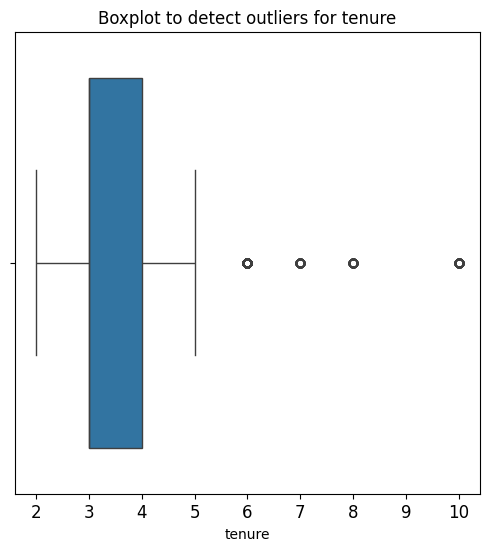

In [ ]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for tenure', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df1['tenure'])

plt.show()

The boxplot indicates outliers in the `tenure` variable.

Let's investigate: how many rows in the data contain outliers in the `tenure` column?

In [ ]:
# In 'tenure', determine the number of rows containing outliers

# Compute the 25th percentile value in 'tenure'
percentile25 = df1['tenure'].quantile(.25)

# Compute the 75th percentile value in 'tenure'
percentile75 = df1['tenure'].quantile(0.75)

# Compute the interquartile range in 'tenure'
iqr = percentile75 - percentile25


# Define the upper and lower limits for non-outlier values in `tenure`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)


# Identify the data containing outliers in `tenure`
outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]

# In 'tenure', count the number of rows containing outliers
print("Number of rows in the data containing outliers in `tenure`:", len(outliers))

Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `tenure`: 824


## Step 3. Data Exploration (Continue EDA)

How many employees left? Also, this figure represents what percentage of all employees?

In [ ]:
# Obtain numbers of employees who left vs. stayed
print(df1['left'].value_counts())
print()

# Obtain percentages of those who left vs. stayed
print(df1['left'].value_counts(normalize=True))

left
0    10000
1     1991
Name: count, dtype: int64

left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


### Data visualizations

Now, let's visualize relationships between relevant variables in the data.First, let's show `average_monthly_hours` distributions for `number_project`, comparing the distributions of employees who stayed vs. left.

To account for the context of sample size, let's include a stacked histogram to visualize the distribution of `number_project` for those who stayed and left.

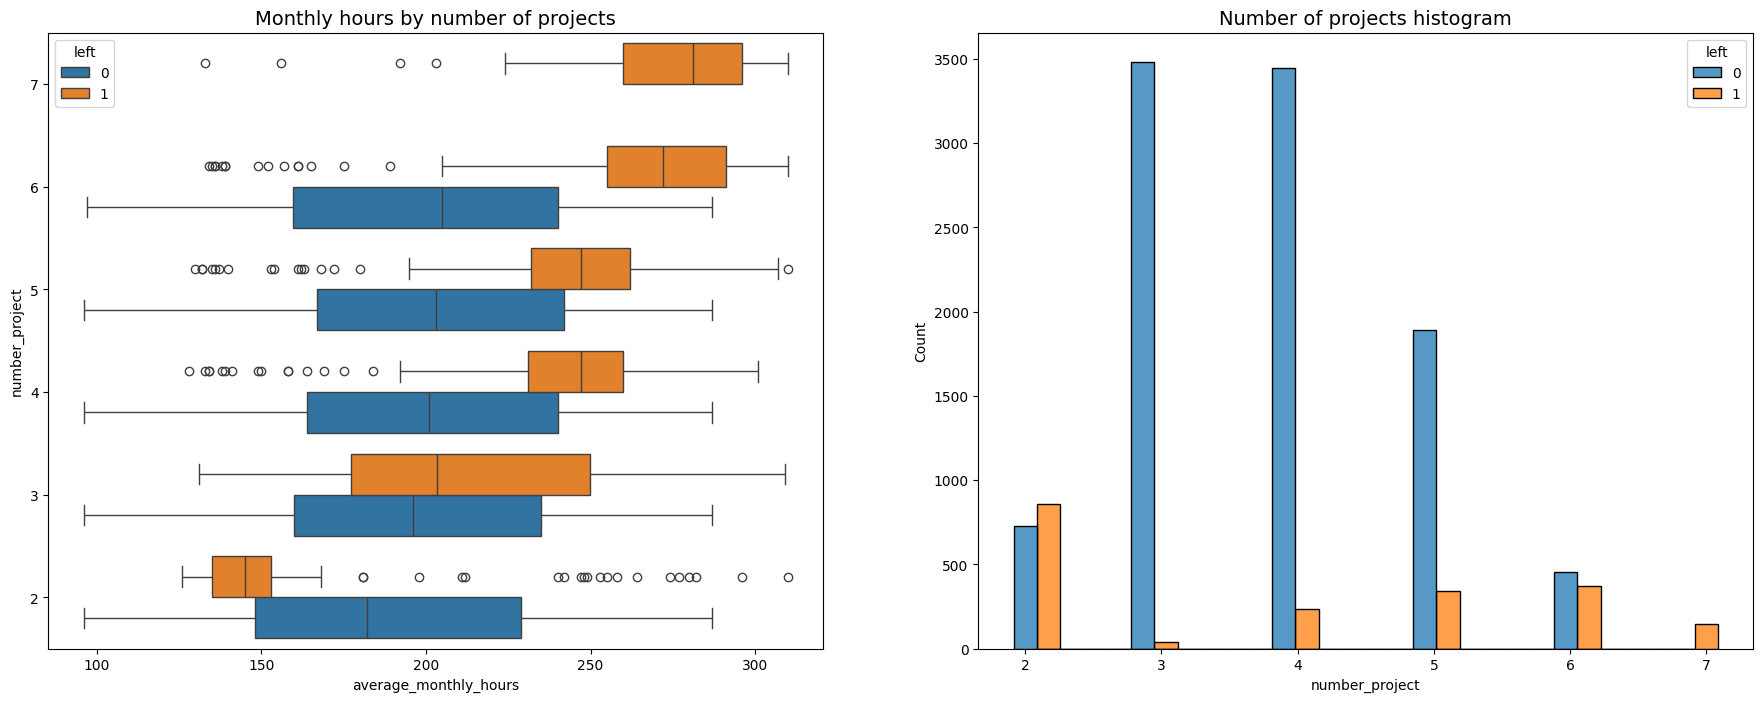

In [ ]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create a boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed vs. left
sns.boxplot(data=df1, x = 'average_monthly_hours',y='number_project', hue='left', orient='h',ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')


# Create histogram showing distribution of `number_project`, comparing employees who stayed vs. left
tenure_stay = df1[df1['left']==0]['number_project']
tenure_left = df1[df1['left']==1]['number_project']
sns.histplot(data=df1, x='number_project',hue='left',multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')


# Show the plots
plt.show()

As the mean hours (stayed and left) increase with the number of projects worked, it appears, as expected, that those involved in more projects also work more hours.

However, observing the plot, a few key things stand out:

* Of those employees who left the company, there are two main groups:

    (A) Those who worked significantly less than their peers with the same number of projects. It's possible they were a) let go, or b) had already given their notice, and were for that reason assigned fewer hours before they left.

    (B) Those who worked much more than their peers with the same number of projects. These employees most likely quit. Before quitting, they might well have been among the top contributors to their respective projects.

* Every worker with seven projects left the company. Between this group and the group of those who left with six projects, the interquartile range was ~255&ndash;295 hours/month&mdash;much more than any other group.

* Seemingly, for employees, the optimal number of projects is 3&ndash;If we examine the histogram at 3 and 4 on the x-axis, the left-stayed ratios are very small.

* According to the BLS, in 2024, for full-time workers, the average weekly hours worked is 41.8. Multiplying by weeks per month, that would make the average monthly hours 167.2

Besides those who worked on two projects, every group&mdash;even those who didn't leave the company&mdash;worked considerably more than that. As it would seem, Salifort's employees are overworked.

Now, let's confirm that all employees with seven projects left.

In [ ]:
# Get value counts of stayed/left for employees with 7 projects
df1[df1['number_project']==7]['left'].value_counts()

left
1    145
Name: count, dtype: int64

This confirms that all employees with 7 projects left.

Next, let's examine the relatiobship between average monthly hours and satisfaction levels.

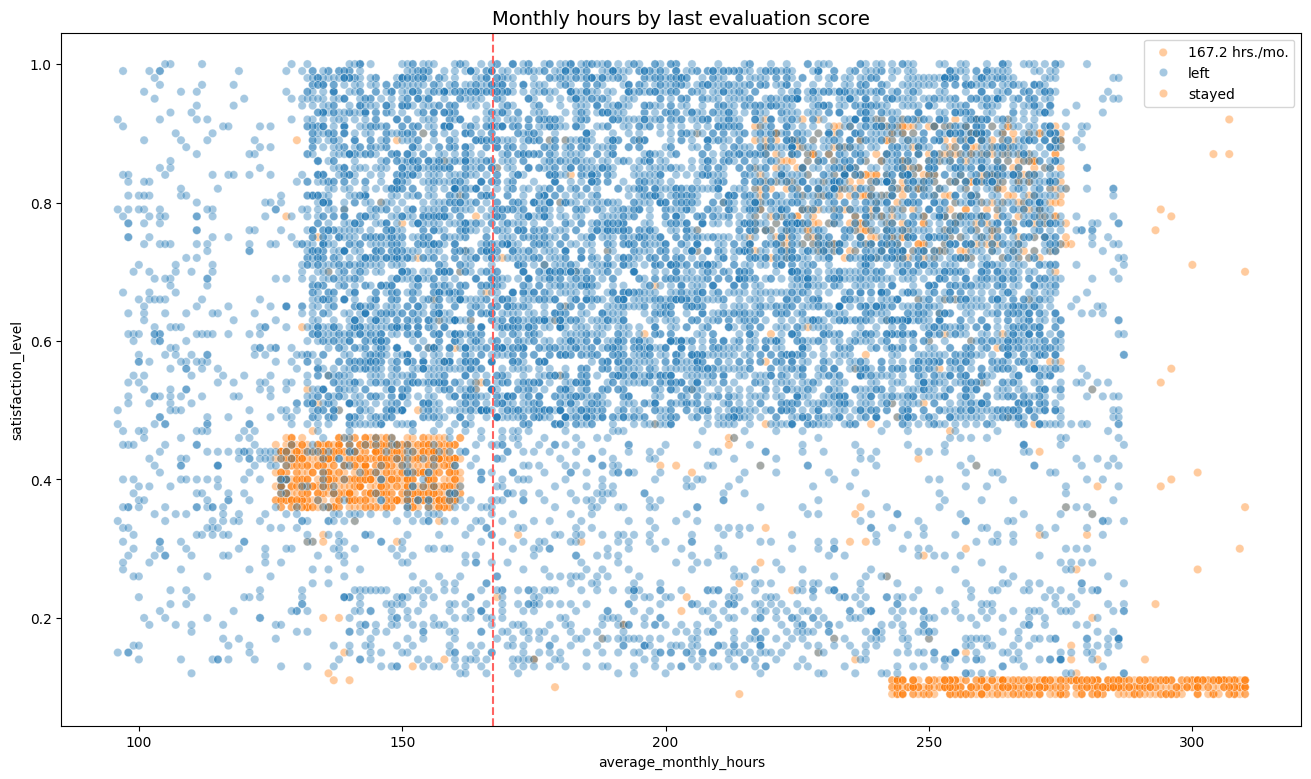

In [ ]:
# Create scatterplot of `average_monthly_hours` versus `satisfaction_level`, comparing employees who stayed vs. left
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left',alpha=0.4)
plt.axvline(x=167.2, color='#ff6361', label='167.2 hrs./mo.', ls='--')
plt.legend(labels=['167.2 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

According to the scatter plot, a considerable number of employees worked ~240&ndash;315 hours per month. That is, for an entire year, over 75 hours per week! This probably contributed significantly to their near-zero satisfaction levels.

The plot also shows many leavers with more standard working hours. Granted, their satisfaction was only around 0.4. While we can't know for sure what caused them to leave, it's possible they felt pressured to work more, given the abnormal hours of their peers. That pressure, in turn, might have lowered their satisfaction levels.

Furthermore, the plot shows a group who worked ~210&ndash;280 hours per month. Their satisfaction levels ranged ~0.7&ndash;0.9.

Note: the unusual shape of the distributions may indicate data manipulation or synthetic data.

Now, let's visualize satisfaction levels by tenure.

2000      3
2001      3
2002      3
2003      3
2004      2
         ..
11995    10
11996    10
11997    10
11998    10
11999     3
Name: tenure, Length: 10000, dtype: int64
0       3
1       6
2       4
3       5
4       3
       ..
1995    3
1996    4
1997    3
1998    5
1999    3
Name: tenure, Length: 1991, dtype: int64


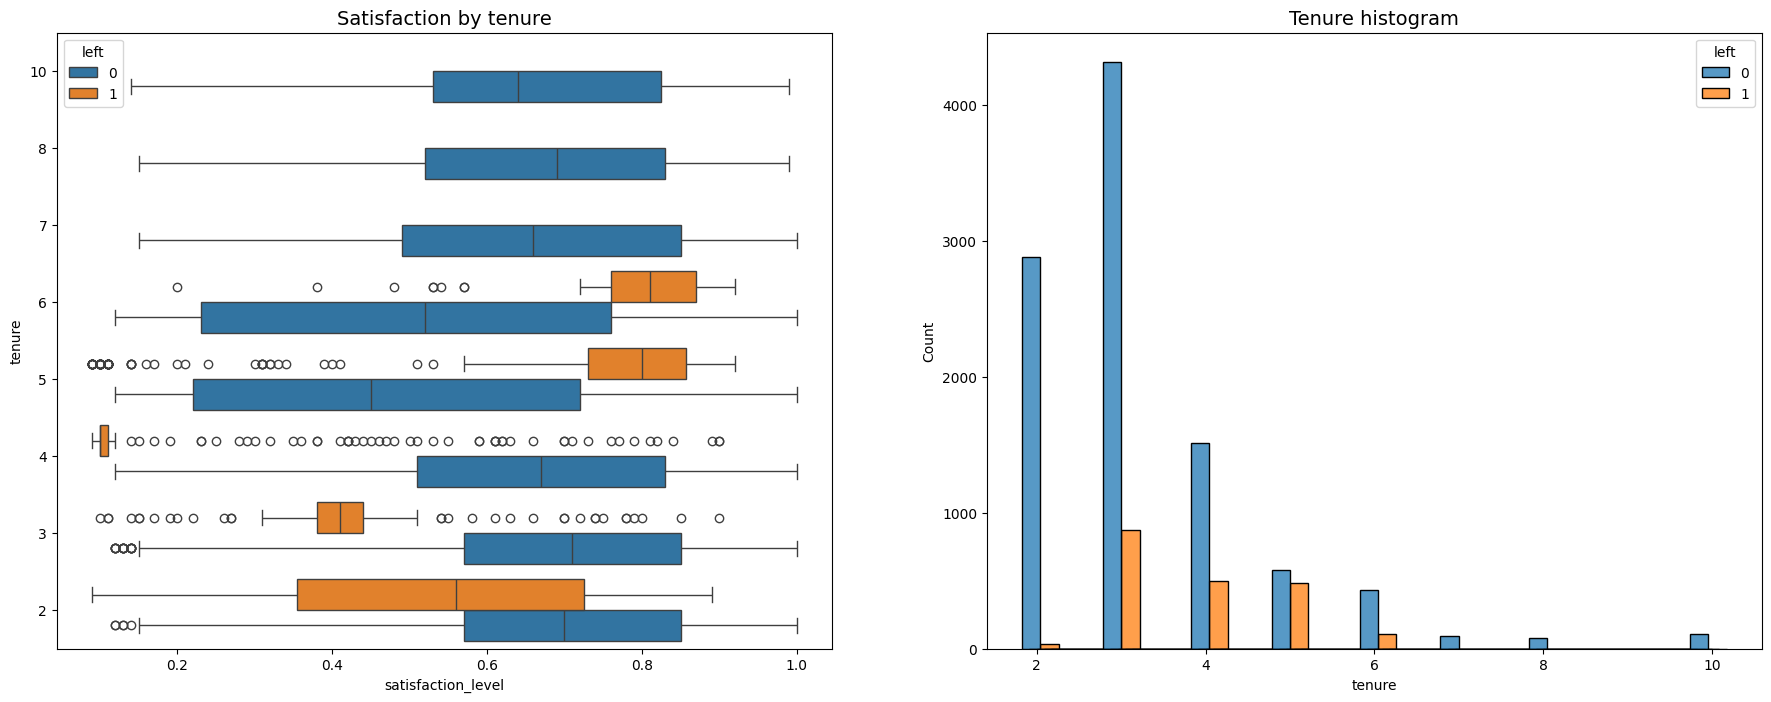

In [ ]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing distributions of `satisfaction_level` by tenure, comparing employees who stayed vs. left
sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize='14')

# Create histogram showing distribution of `tenure`, comparing employees who stayed vs. left
tenure_stay = df1[df1['left']==0]['tenure']
print(tenure_stay)
tenure_left = df1[df1['left']==1]['tenure']
print(tenure_left)

sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize='14')

plt.show();

This plot shows us several things:

- Departed employees fall into two primary categories: 1) dissatisfied employees with shorter tenures and 2) highly satisfied employees with average-length tenures.
- Four-year employees who left seem to have atypically low satisfaction levels. What changes might have had an impact at the four-year mark?
- The longest-tenured employees stayed, and their satisfaction levels are aligned with those of newer employees who chose to stay.
- Longer-tenured employees are few, relatively speaking. These may represent the company's high-level, higher-paid employees.

Now, let's calculate the mean and median satisfaction scores of employees who left and those who didn't.

In [ ]:
# Calculate mean and median satisfaction scores of employees who left vs. stayed
df1.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])

/tmp/ipython-input-18-3183257080.py:2: FutureWarning: The provided callable <function mean at 0x7e465f64e3e0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df1.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])
/tmp/ipython-input-18-3183257080.py:2: FutureWarning: The provided callable <function median at 0x7e465c3236a0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df1.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])


mean  median
left                  
0     0.667365    0.69
1     0.440271    0.41

As expected, the mean and median satisfaction scores of employees who left fall below those of employees who stayed. Among those who remained, the mean satisfaction score is slightly below the median score. This may indicate a left skew.

Next, let's examine salary levels for different tenures.

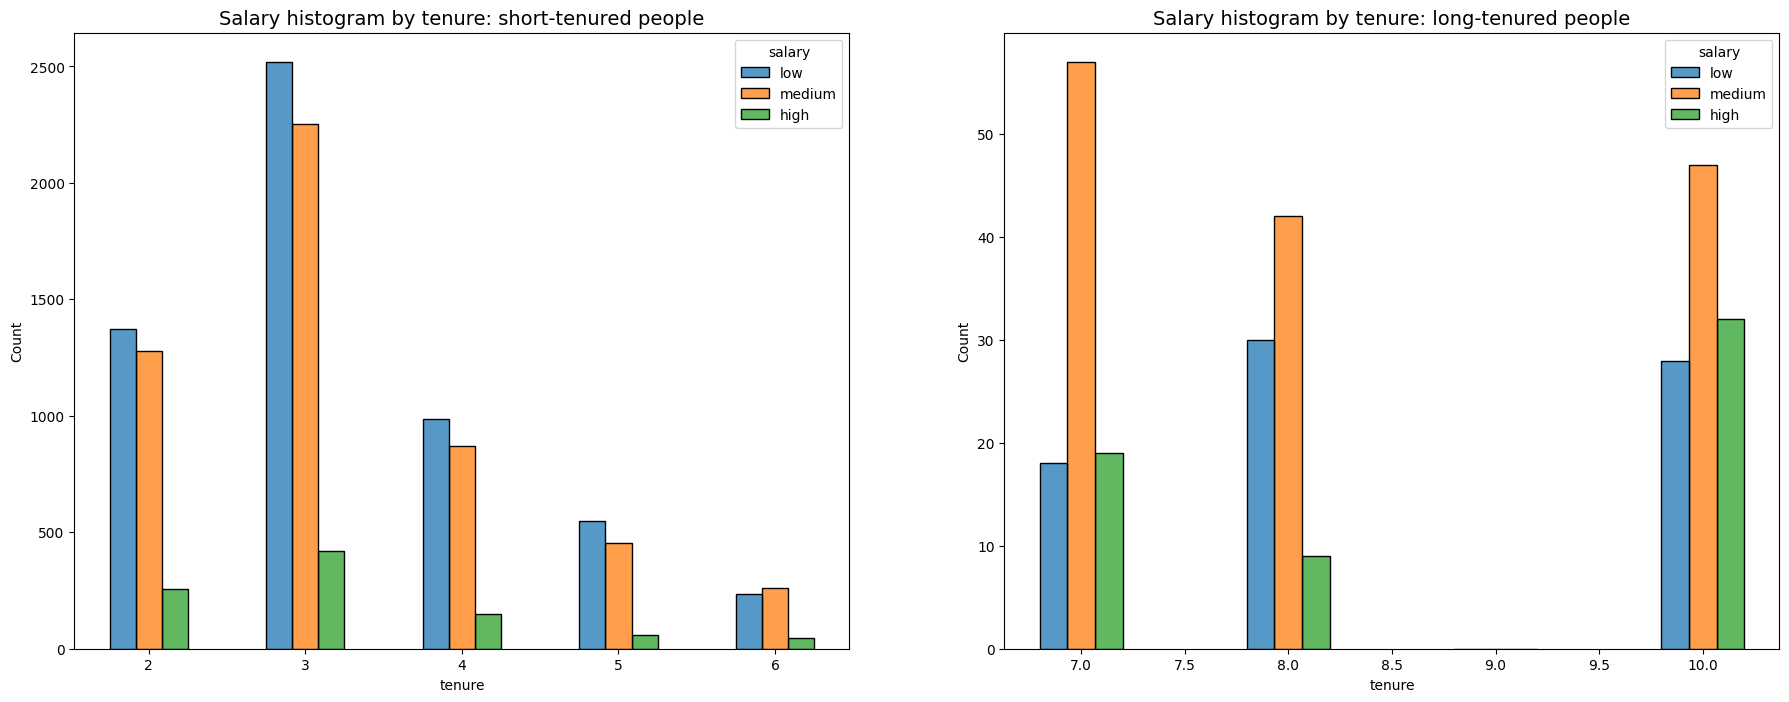

In [ ]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Define short-tenured employees
tenure_short = df1[df1['tenure'] < 7]

# Define long-tenured employees
tenure_long = df1[df1['tenure'] > 6]

# Plot short-tenured histogram
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1,
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')

# Plot long-tenured histogram
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1,
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14');

According to the plots, long-tenured employees were not disproportionately comprised of those who were paid more.

Now, creating a scatterplot of `average_monthly_hours` versus `last_evaluation`, let's see if there's a connection between longer hours and high evaluation scores.

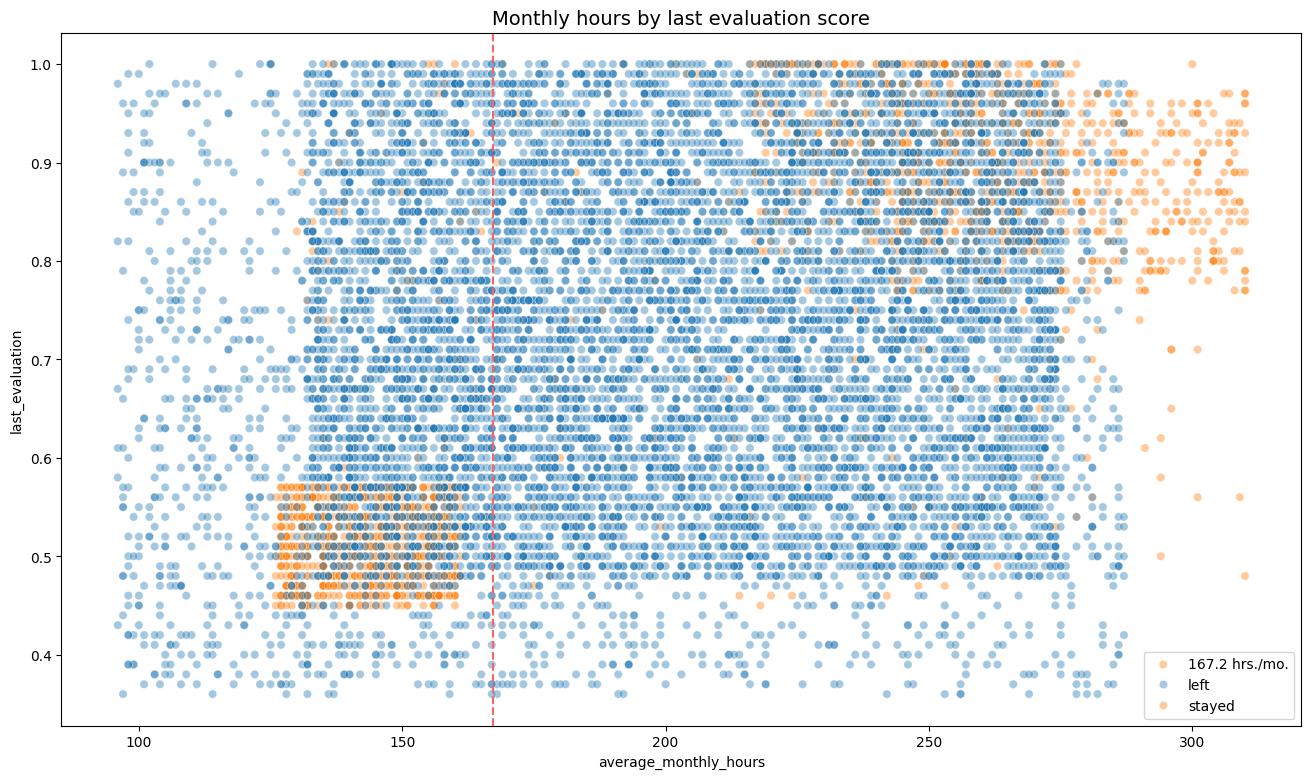

In [ ]:
#Create scatterplot of `average_monthly_hours` versus `last_evaluation`
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=167.2, color='#ff6361', label='167.2 hrs./mo.', ls='--')
plt.legend(labels=['167.2 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

The scatterplot indicates several things:
- Of those who left, we have two main categories: overworked employees who performed very well *and* employees who worked slightly under the nominal monthly average (167.2 is the estimate for this case study) with lower evaluation scores.
- Hours worked and evaluation score seem to be correlated.
- While there isn't a high percentage of employees in the plot's upper left quadrant, working long hours doesn't seem to guarantee a good evaluation score.
- Most of the employees in this company work well over 167.2 hours per month.

Next, let's examine whether employees who worked very long hours were recently promoted.

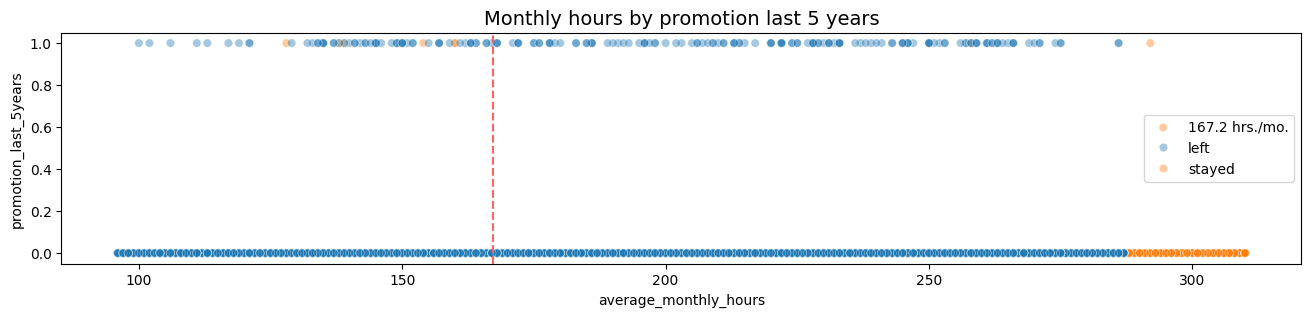

In [ ]:
# Create plot to show relationship between `average_monthly_hours` and `promotion_last_5years`
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=167.2, color='#ff6361', ls='--')
plt.legend(labels=['167.2 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14');

Here is what the plot shows:
- Of those who were promoted in the last 5 years, very few left.
- Of those employees who worked the most hours, very few were promoted.
- Of those of the employees who left, all were working the longest hours.

Now, of the employees who left, let's inspect how they are distributed across departments.

In [ ]:
# Display counts for each department
df1["department"].value_counts()

department
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64

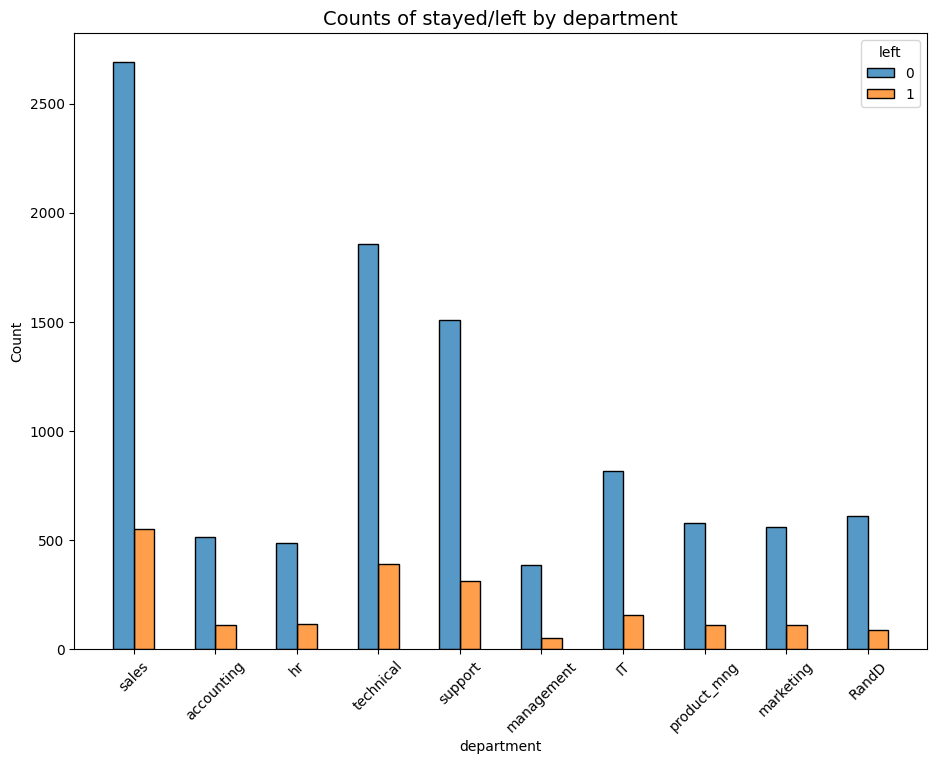

In [ ]:
# Create stacked histogram to compare departmental distribution of left vs. retained employees
plt.figure(figsize=(11,8))
sns.histplot(data=df1, x='department', hue='left', discrete=1,
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation=45)
plt.title('Counts of stayed/left by department', fontsize=14);

Between departments, we can't seem to find one that differs significantly in its proportion of employees who left to those who stayed.

Next, let's check for strong correlations between the data's variables.

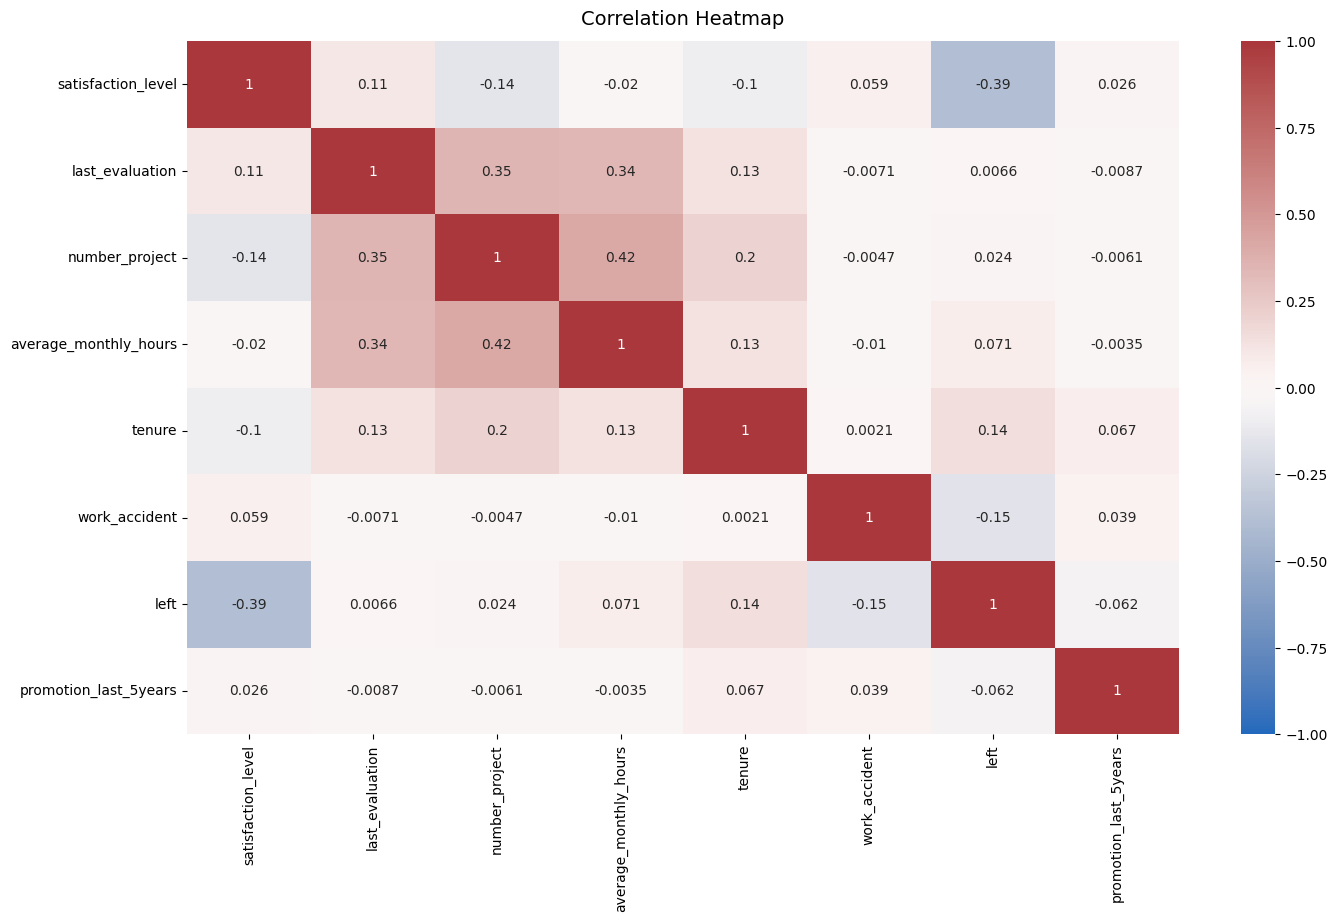

In [ ]:
# Plot a correlation heatmap
plt.figure(figsize=(16, 9))
# Select only numerical features for correlation calculation
numerical_df = df0.select_dtypes(include=['number'])
heatmap = sns.heatmap(numerical_df.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

According to the heatmap, there is:

* Positive correlation between number of projects, monthly hours, and evaluation scores
* Negative correlation between leaving and satisfaction level

### Insights

It appears that if an employee has spent more than six years at the company, they tend to stay. This makes sense. If they have remained at Salifort for six whole years, they may enjoy working there.

However, for those who left, what has driven them away? Based on our analyses, it seems to be poor management. After long hours on numerous projects, employees become discouraged when they are not rewarded with promotions or when their evaluation scores do not reflect their performance. In fact, within the company, there is a sizable group that has simply had enough of Salifort.

## Step 4. Model Building
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task

Our goal is to predict the outcome of the categorical variable. Therefore, this task involves binary classification. This outcome variable, `left`, will be either 1 (indicating employee left) or 0 (indicating employee didn't leave).

### Identify the types of models most appropriate for this task.

Since the outcome variable we want to predict (whether an employee leaves the company) is categorical, we can build either a Tree-based Machine Learning model or a Logistic Regression model.

Let's implement both approaches, and see how they compare.

### Modeling Approach A: Logistic Regression Model


Since the task involves binary classification, binomial logistic regression is a great choice for modeling.

Before splitting the data, let's encode the non-numeric variables: `department` and `salary`.

Since `department` is a categorical variable, let's make it into a dummy. While `salary` is categorical too, it's also ordinal. With a hierarchy to the categories, let's not dummy it. Instead, let's convert the levels to numbers, 0&ndash;2.

In [ ]:
# Copy the dataframe
df_enc = df1.copy()

# Encode the `salary` column as an ordinal numeric category
df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Dummy encode the `department` column
df_enc = pd.get_dummies(df_enc, drop_first=False)

# Display the new dataframe
df_enc.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  left  promotion_last_5years  salary  department_IT  \
0       3              0     1                      0       0          False   
1       6              0     1                      0       1          False   
2       4              0     1                      0       1          False   
3       5              0     1                      0       0          False   
4       3              0     1                      0       0          False   

   department_RandD  department_accounting  department_hr  \
0             False                  False          False   
1             False                  False          False   
2             False                  False          False   
3             False                  False          False   
4             False                  False          False   

   department_management  department_marketing  department_product_mng  \
0                  False                 False                   False   
1                  False                 False                   False   
2                  False                 False                   False   
3                  False                 False                   False   
4                  False                 False                   False   

   department_sales  department_support  department_technical  
0              True               False                 False  
1              True               False                 False  
2              True               False                 False  
3              True               False                 False  
4              True               False                 False

Create a heatmap to visualize correlations levels between variables.

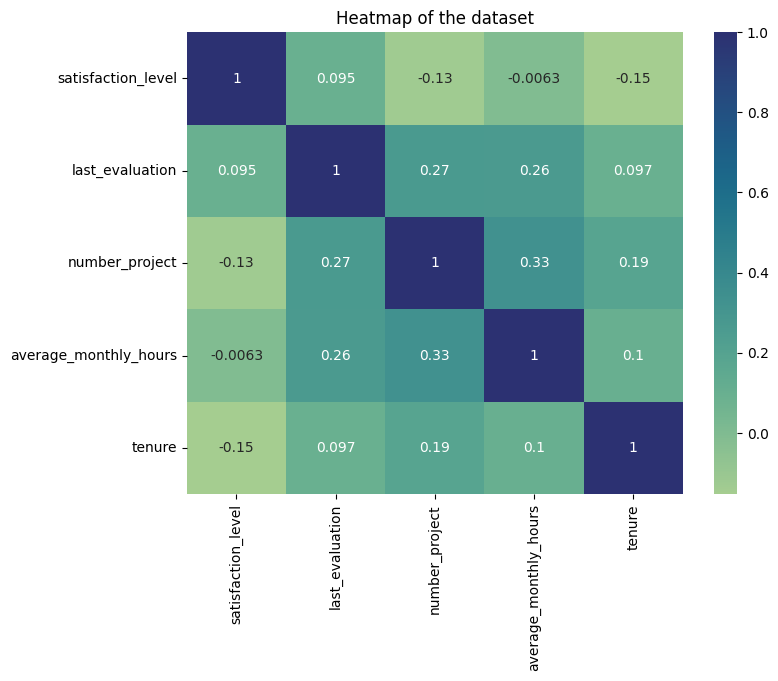

In [ ]:
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']]
            .corr(), annot=True, cmap="crest")
plt.title('Heatmap of the dataset')
plt.show()

Create a stacked bart plot to visualize number of employees across department, comparing those who left with those who didn't.

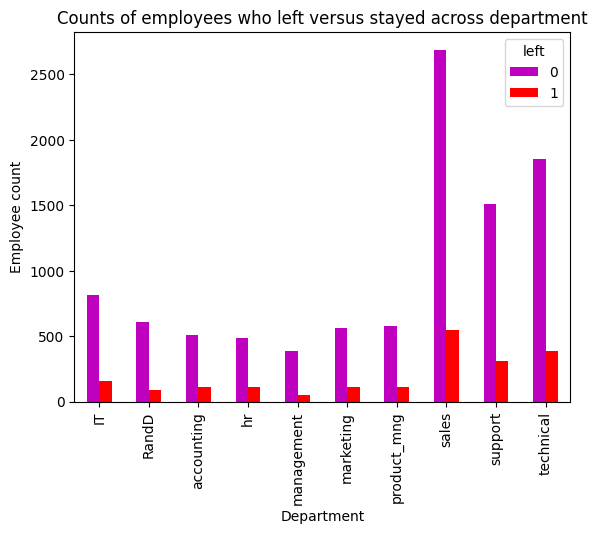

In [ ]:
# Create a stacked bart plot to visualize number of employees across department, comparing those who left with those who didn't
# In the legend, 0 (purple color) represents employees who did not leave, 1 (red color) represents employees who left
pd.crosstab(df1['department'], df1['left']).plot(kind ='bar',color='mr')
plt.title('Counts of employees who left versus stayed across department')
plt.ylabel('Employee count')
plt.xlabel('Department')
plt.show()

Since logistic regression is quite sensitive to outliers, let's remove the outliers previously discovered in the `tenure` column.

In [ ]:
# Select rows without outliers in `tenure` and save resulting dataframe in a new variable
df_logreg = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]

# Display first few rows of new dataframe
df_logreg.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   
5                0.41             0.50               2                    153   

   tenure  work_accident  left  promotion_last_5years  salary  department_IT  \
0       3              0     1                      0       0          False   
2       4              0     1                      0       1          False   
3       5              0     1                      0       0          False   
4       3              0     1                      0       0          False   
5       3              0     1                      0       0          False   

   department_RandD  department_accounting  department_hr  \
0             False                  False          False   
2             False                  False          False   
3             False                  False          False   
4             False                  False          False   
5             False                  False          False   

   department_management  department_marketing  department_product_mng  \
0                  False                 False                   False   
2                  False                 False                   False   
3                  False                 False                   False   
4                  False                 False                   False   
5                  False                 False                   False   

   department_sales  department_support  department_technical  
0              True               False                 False  
2              True               False                 False  
3              True               False                 False  
4              True               False                 False  
5              True               False                 False

Isolate the outcome variable, for the model to predict.

In [ ]:
# Isolate the outcome variable
y = df_logreg['left']

# Display first few rows of the outcome variable
y.head()

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

Considering which variables will help you predict the outcome variable, `left`, select your model features.

In [ ]:
# Select the features you want to use in your model
X = df_logreg.drop('left', axis=1)

# Display the first few rows of the selected features
X.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   
5                0.41             0.50               2                    153   

   tenure  work_accident  promotion_last_5years  salary  department_IT  \
0       3              0                      0       0          False   
2       4              0                      0       1          False   
3       5              0                      0       0          False   
4       3              0                      0       0          False   
5       3              0                      0       0          False   

   department_RandD  department_accounting  department_hr  \
0             False                  False          False   
2             False                  False          False   
3             False                  False          False   
4             False                  False          False   
5             False                  False          False   

   department_management  department_marketing  department_product_mng  \
0                  False                 False                   False   
2                  False                 False                   False   
3                  False                 False                   False   
4                  False                 False                   False   
5                  False                 False                   False   

   department_sales  department_support  department_technical  
0              True               False                 False  
2              True               False                 False  
3              True               False                 False  
4              True               False                 False  
5              True               False                 False

Split the data into training set and testing set. Since the classes are unbalanced, stratify based on the values in `y`.

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

Construct a logistic regression model and fit it to the training dataset.

In [ ]:
# Construct a logistic regression model to fit to the training dataset
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

Test the logistic regression model: use it to make predictions on the test set.

In [ ]:
# Use the logistic regression model to make predictions on the test set
y_pred = log_clf.predict(X_test)

Create a confusion matrix to visualize the results of the model.

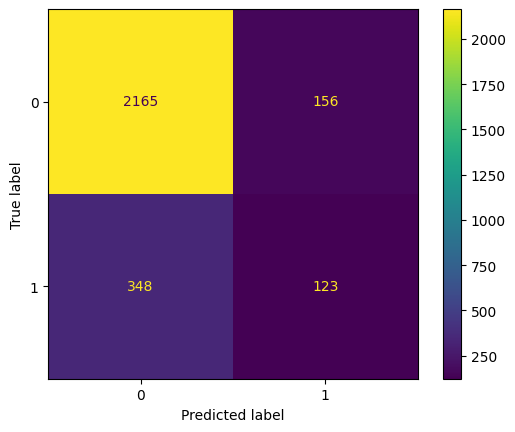

In [ ]:
# Compute confusion matrix values
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Display the confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm,
                                  display_labels=log_clf.classes_)

# Plot the matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

Here is the breakdown of the matrix:

* The upper-left quadrant displays the number of **true negatives**: the number of people who did not leave that the model accurately predicted did not leave.

* The upper-right quadrant displays the number of **false positives**: the number of people who did not leave the model inaccurately predicted as leaving.

* The bottom-left quadrant displays the number of **false negatives**: the number of people who left that the model inaccurately predicted did not leave

* The bottom-right quadrant displays the number of **true positives**: The number of people who left the model accurately predicted as leaving

In a perfect model, we would see no false negatives or false positives, only true negatives and true positives.

Since this is a binary classification task, the class balance informs the way you interpret accuracy metrics. Therefore, before evaluating the model, let's check the class balance in the data.

In [ ]:
df_logreg['left'].value_counts(normalize=True)

left
0    0.831468
1    0.168532
Name: proportion, dtype: float64

With a split of around 83%-17%, the data is neither perfectly balanced, nor too imbalanced. If it was more severely imbalanced, it might make sense to resample the data. However, since the imbalance is not too severe, we can use this data without modifying the class balance and continue evaluating the model.

Now, let's create a classification report to evaluate the performance of the logistic regression model. This will include multiple metrics: precision, recall, f1-score, and accuracy.

In [ ]:
# Create a classification report for the model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.44      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



According to the report, the logistic regression model achieved a precision of 79%, recall of 82%, f1-score of 80% (all weighted averages), and accuracy of 82%. However, if predicting employees who leave is most important, the scores are significantly lower.

### Modeling Approach B: Tree-based Model
This approach covers implementation of Decision Tree and Random Forest.

Isolate the outcome variable.

In [ ]:
# Isolate the outcome variable
y = df_enc['left']

# Display the first few rows of `y`
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

Select the features.

In [ ]:
# Select the features
X = df_enc.drop('left', axis=1)

# Display the first few rows of `X`
X.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  promotion_last_5years  salary  department_IT  \
0       3              0                      0       0          False   
1       6              0                      0       1          False   
2       4              0                      0       1          False   
3       5              0                      0       0          False   
4       3              0                      0       0          False   

   department_RandD  department_accounting  department_hr  \
0             False                  False          False   
1             False                  False          False   
2             False                  False          False   
3             False                  False          False   
4             False                  False          False   

   department_management  department_marketing  department_product_mng  \
0                  False                 False                   False   
1                  False                 False                   False   
2                  False                 False                   False   
3                  False                 False                   False   
4                  False                 False                   False   

   department_sales  department_support  department_technical  
0              True               False                 False  
1              True               False                 False  
2              True               False                 False  
3              True               False                 False  
4              True               False                 False

Split the data into training, validating, and testing sets.

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

#### Decision tree - Round 1

Construct a decision tree model and set up cross-validated grid-search to exhuastively search for the best model parameters.

In [ ]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters
cv_params = {
    'max_depth':[4, 6, 8, None],
    'min_samples_leaf': [2, 5, 1],
    'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
    }

# Instantiate GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

Fit the decision tree model to the training data.

In [ ]:
%%time
tree1.fit(X_train, y_train)

CPU times: user 4.77 s, sys: 10.9 ms, total: 4.78 s
Wall time: 4.8 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

Identify the optimal values for the decision tree parameters.

In [ ]:
# Check best parameters
tree1.best_params_

{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}

Identify the best AUC score achieved by the decision tree model on the training set.

In [ ]:
# Check best AUC score on CV
tree1.best_score_

np.float64(0.969819392792457)

This strong AUC score shows that the model can predict employees who will leave very well.

Next, let's write a function that will help you extract all the scores from the grid search.

In [ ]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc

    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Obtain all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create results table
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })

    return table

Use the function just defined to get all the scores from grid search.

In [ ]:
# Get all CV scores
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results

model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819

These scores indicate good model performance.

While decision trees can be vulnerable to overfitting, random forests, as we will see in the next section, prevent this by incorporating multiple trees to make predictions.

#### Random forest - Round 1

 To exhuastively search for the best model parameters, construct a random forest model and cross-validated grid-search.

In [ ]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None],
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }

# Assign a dictionary of scoring metrics to capture
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
    }

# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [ ]:
%%time
rf1.fit(X_train, y_train) # --> Wall time: ~10min

CPU times: user 26min 54s, sys: 3.23 s, total: 26min 57s
Wall time: 27min 4s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

Fit the random forest model to the training data.

Specify path to the folder in which to save the model.

In [ ]:
# Define a path to the folder in which to save the model
path = '/home/jovyan/work/'

Define functions to pickle and read in the model.

In [ ]:
def write_pickle(path, model_object, save_as: str):
    '''
    Saves a model object as a pickle file in the given path.

    Parameters:
        path (str): Directory where the pickle will be saved.
        model_object: Model to be saved.
        save_as (str): Filename without extension.
    '''
    os.makedirs(path, exist_ok=True)  # Make sure folder exists
    full_path = os.path.join(path, save_as + '.pickle')  # Build full file path
    with open(full_path, 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [ ]:
def read_pickle(path, saved_model_name:str):
    '''
    In:
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in

    Out:
        model: the pickled model
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

Save the model in a pickle file and then read it in.

In [ ]:
# Write pickle
write_pickle(path, rf1, 'hr_rf1')

In [ ]:
# Read pickle
rf1 = read_pickle(path, 'hr_rf1')

Identify the best AUC score achieved by the random forest model on the training set.

In [ ]:
# Check best AUC score on CV
rf1.best_score_

np.float64(0.9804250949807172)

Identify the optimal values for the parameters of the random forest model.

In [ ]:
# Check best params
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 500}

Collect the evaluation scores on the training set for the decision tree and random forest models.

In [ ]:
# Get all CV scores
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
print(tree1_cv_results)
print(rf1_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.950023  0.915614  0.932467  0.977983  0.980425


Besides the recall score, the scores of the random forest model are better than those of the decision tree model (the random forest's recall score is only 0.001 lower). As this indicates, the random forest model generally outperforms the decision tree model.

Now, let's evaluate the final model on the test set.

Define a function that gets all the scores from a model's predictions.

In [ ]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In:
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })

    return table

Now let's use the best performing model to predict on the test set.

In [ ]:
# Get predictions on test data
rf1_test_scores = get_scores('random forest1 test', rf1, X_test, y_test)
rf1_test_scores

model  precision    recall        f1  accuracy       AUC
0  random forest1 test   0.964211  0.919679  0.941418  0.980987  0.956439

As the test scores are very similar to the validation scores, this looks like a strong model. Since this test set was only used for this model, we can be more confident that the model will perform just as well on new, unseen data.

#### Feature Engineering

While the high evaluation scores are impressive, one might be somewhat skeptical. There is a chance of some data leakage, which occurs when the training data contains target-relevant information that will not be produced during actual prediction. This leads to high performance on the training set (and possibly even the validation data) but poor performance on the model. In other words, leakage causes a model to appear more accurate than it actually is.

In this example, the company will most likely not have reported satisfaction levels from every employee. Also, the `average_monthly_hours` column might be a source of leakage. If employees have already planned to leave or have already been identified by management for termination, they might be working reduced hours.

In the first round, our decision tree and random forest models included all variables as features. Now, in this next round, we will incorporate feature engineering to improve our models.

Therefore, let's drop `satisfaction_level` and create a new feature, a binary variable, "overworked."

In [ ]:
# Drop `satisfaction_level` and save resulting dataframe in new variable
df2 = df_enc.drop('satisfaction_level', axis=1)

# Display first few rows of new dataframe
df2.head()

last_evaluation  number_project  average_monthly_hours  tenure  \
0             0.53               2                    157       3   
1             0.86               5                    262       6   
2             0.88               7                    272       4   
3             0.87               5                    223       5   
4             0.52               2                    159       3   

   work_accident  left  promotion_last_5years  salary  department_IT  \
0              0     1                      0       0          False   
1              0     1                      0       1          False   
2              0     1                      0       1          False   
3              0     1                      0       0          False   
4              0     1                      0       0          False   

   department_RandD  department_accounting  department_hr  \
0             False                  False          False   
1             False                  False          False   
2             False                  False          False   
3             False                  False          False   
4             False                  False          False   

   department_management  department_marketing  department_product_mng  \
0                  False                 False                   False   
1                  False                 False                   False   
2                  False                 False                   False   
3                  False                 False                   False   
4                  False                 False                   False   

   department_sales  department_support  department_technical  
0              True               False                 False  
1              True               False                 False  
2              True               False                 False  
3              True               False                 False  
4              True               False                 False

In [ ]:
# Create `overworked` column. Currently, it's identical to average monthly hours.
df2['overworked'] = df2['average_monthly_hours']

# Inspect max and min average monthly hours values
print('Max hours:', df2['overworked'].max())
print('Min hours:', df2['overworked'].min())

Max hours: 310
Min hours: 96


If 167.2 is the average monthly hours, then perhaps those who work more than 170 hours per month could be described as "overworked."

To make the `overworked` column binary, let's reassign the column using a boolean mask.
- `df3['overworked'] > 170` creates a series of booleans, consisting of `True` for every value > 170 and `False` for every values ≤ 170
- `.astype(int)` converts all `True` to `1` and all `False` to `0`

In [ ]:
# Define `overworked`
df2['overworked'] = (df2['overworked'] > 170).astype(int)

# Display first few rows of new column
df2['overworked'].head()

0    0
1    1
2    1
3    1
4    0
Name: overworked, dtype: int64

Drop the `average_monthly_hours` column.

In [ ]:
# Drop the `average_monthly_hours` column
df2 = df2.drop('average_monthly_hours', axis=1)

# Display first few rows of resulting dataframe
df2.head()

last_evaluation  number_project  tenure  work_accident  left  \
0             0.53               2       3              0     1   
1             0.86               5       6              0     1   
2             0.88               7       4              0     1   
3             0.87               5       5              0     1   
4             0.52               2       3              0     1   

   promotion_last_5years  salary  department_IT  department_RandD  \
0                      0       0          False             False   
1                      0       1          False             False   
2                      0       1          False             False   
3                      0       0          False             False   
4                      0       0          False             False   

   department_accounting  department_hr  department_management  \
0                  False          False                  False   
1                  False          False                  False   
2                  False          False                  False   
3                  False          False                  False   
4                  False          False                  False   

   department_marketing  department_product_mng  department_sales  \
0                 False                   False              True   
1                 False                   False              True   
2                 False                   False              True   
3                 False                   False              True   
4                 False                   False              True   

   department_support  department_technical  overworked  
0               False                 False           0  
1               False                 False           1  
2               False                 False           1  
3               False                 False           1  
4               False                 False           0

Isolate the features and target variables

In [ ]:
# Isolate the outcome variable
y = df2['left']

# Select the features
X = df2.drop('left', axis=1)

Split the data into training and testing sets.

In [ ]:
# Create test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

#### Decision tree - Round 2

In [ ]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture

scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
    }

# Instantiate GridSearch
tree2 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [ ]:
%%time
tree2.fit(X_train, y_train)

CPU times: user 4.6 s, sys: 14 ms, total: 4.61 s
Wall time: 4.67 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [ ]:
# Check best params
tree2.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}

In [ ]:
# Check best AUC score on CV
tree2.best_score_

np.float64(0.9583665988062298)

Even without satisfaction levels and detailed hours worked data, the model performs very well.

Now, let's check the other scores.

In [ ]:
# Get all CV scores
tree2_cv_results = make_results('decision tree2 cv', tree2, 'auc')
print(tree1_cv_results)
print(tree2_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
               model  precision    recall       F1  accuracy       auc
0  decision tree2 cv   0.858261  0.900202  0.87838  0.958523  0.958367


The scores fell a bit. However, this is to be expected, given the fewer features. Overall, these scores are still very good.

#### Random forest - Round 2

In [ ]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None],
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }

# Assign a dictionary of scoring metrics to capture
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
    }

# Instantiate GridSearch
rf2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [ ]:
# Fit the model
%%time
rf2.fit(X_train, y_train) # --> Wall time: 7min 5s

CPU times: user 19min 8s, sys: 2.68 s, total: 19min 10s
Wall time: 19min 15s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [ ]:
# Write pickle
write_pickle(path, rf2, 'hr_rf2')

In [ ]:
# Read in pickle
rf2 = read_pickle(path, 'hr_rf2')

In [ ]:
# Check best params
rf2.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 300}

In [ ]:
# Check best AUC score on CV
rf2.best_score_

np.float64(0.9647844322423096)

In [ ]:
# Get all CV scores
rf2_cv_results = make_results('random forest2 cv', rf2, 'auc')
print(tree2_cv_results)
print(rf2_cv_results)

               model  precision    recall       F1  accuracy       auc
0  decision tree2 cv   0.858261  0.900202  0.87838  0.958523  0.958367
               model  precision    recall        F1  accuracy       auc
0  random forest2 cv   0.860623  0.872056  0.866118  0.955299  0.964784


As before, most of the scores fell a bit. However, when using AUC as the metric, the random forest performs better than the decision tree.

Now, let's score the champion model on the test set.

In [ ]:
# Get predictions on test data
rf2_test_scores = get_scores('random forest2 test', rf2, X_test, y_test)
rf2_test_scores

model  precision   recall        f1  accuracy       AUC
0  random forest2 test   0.866279  0.89759  0.881657  0.959973  0.934995

This final model seems stable and well-performing.

Next, let's plot a confusion matrix to visualize how well it predicts on the test set.

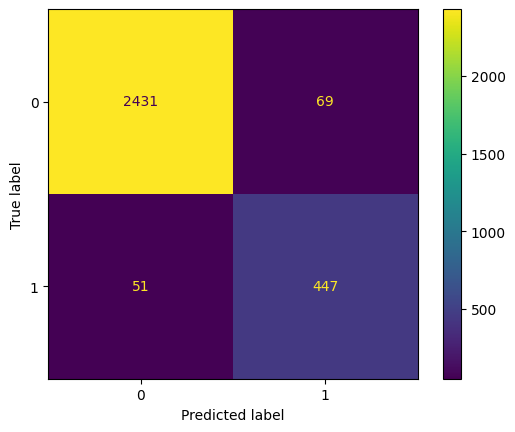

In [ ]:
# Generate array of values for confusion matrix
preds = rf2.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf2.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf2.classes_)
disp.plot(values_format='');

Evidently, the model predicts more false positives than false negatives. This indicates that some employees, who have no future or intention of leaving, may be misidentified as at risk of quitting or getting fired. Yet still, it's a strong strong model.

For exploratory purpose, let's inspect the decision tree model's splits, as well as the random forest model's most important features.

#### Decision tree splits

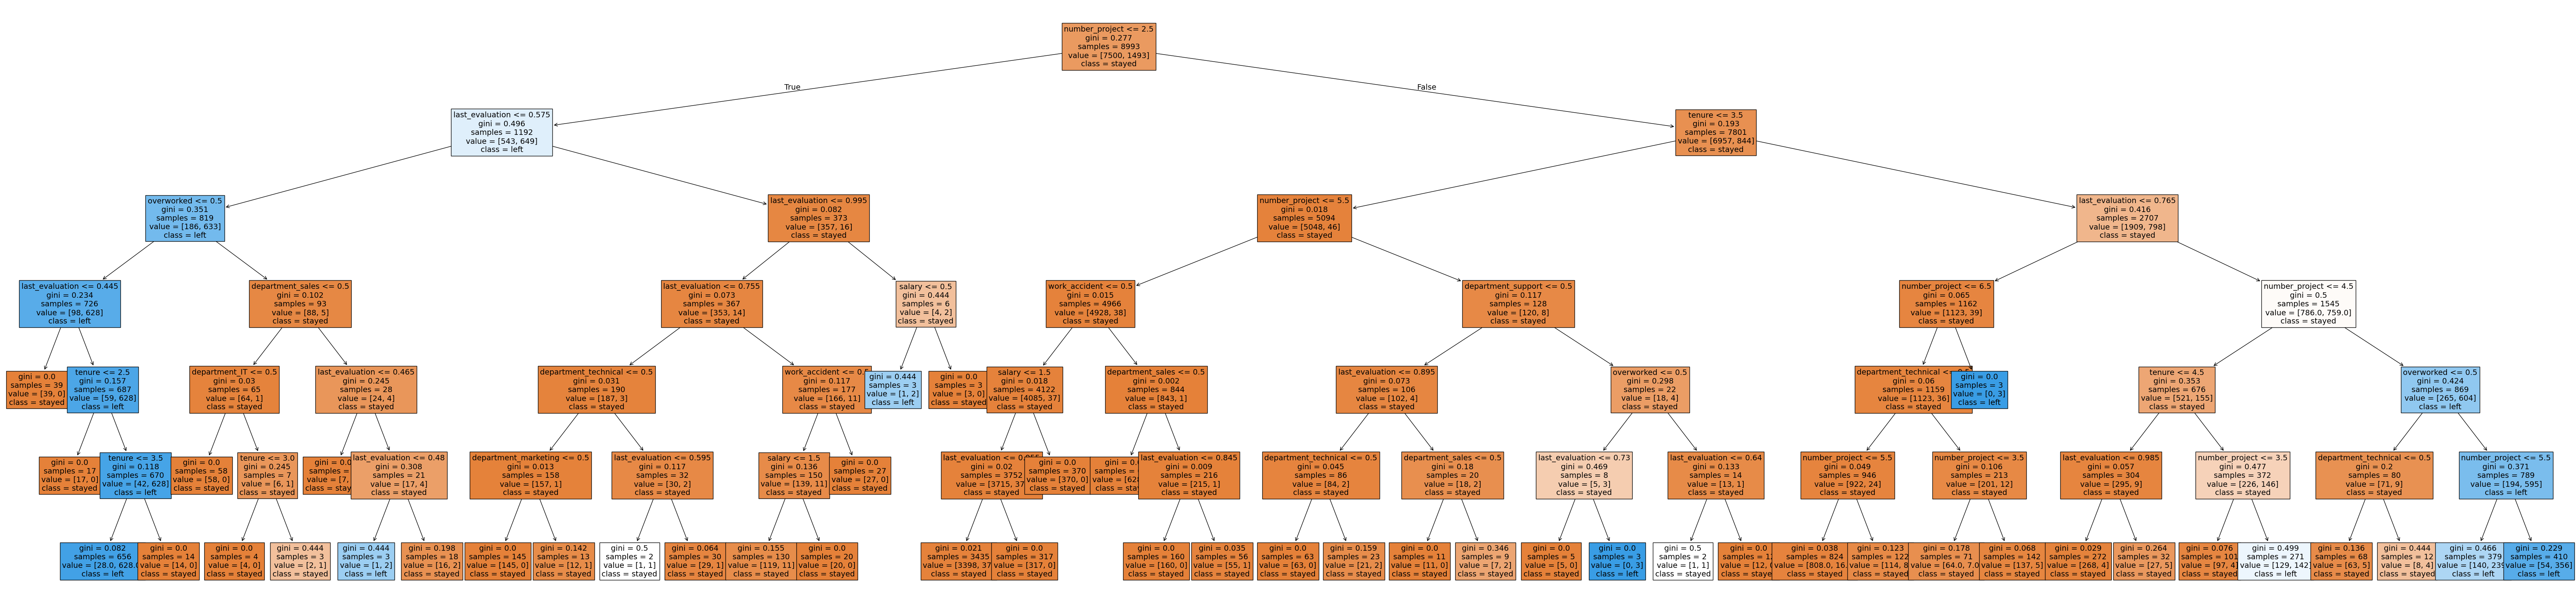

In [ ]:
# Plot the decision tree
plt.figure(figsize=(85,20))
plot_tree(tree2.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns,
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

#### Decision tree feature importance

We can also get feature importance from decision trees (see the [DecisionTreeClassifier scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.feature_importances_) for details).

In [ ]:
#tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, columns=X.columns)
tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_,
                                 columns=['gini_importance'],
                                 index=X.columns
                                )
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

gini_importance
last_evaluation              0.344443
number_project               0.344235
tenure                       0.214199
overworked                   0.093587
department_technical         0.001179
salary                       0.000911
department_sales             0.000626
department_support           0.000418
work_accident                0.000183
department_IT                0.000141
department_marketing         0.000078

Let's create a barplot to visualize the decision tree feature importances.

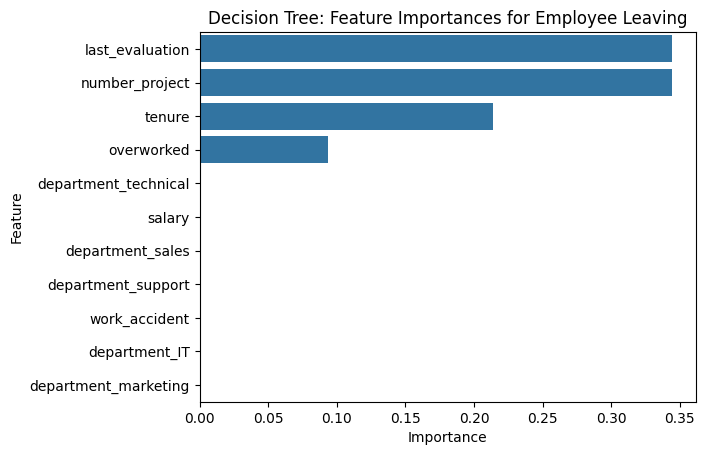

In [ ]:
sns.barplot(data=tree2_importances, x="gini_importance", y=tree2_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

In this decision tree model, it looks like last_evaluation, number_project, tenure, and overworked have the highest importance, in that order. In other words, these variables are most helpful in predicting the outcome variable, left.

#### Random forest feature importance

Next, let's plot the feature importances for the random forest model.

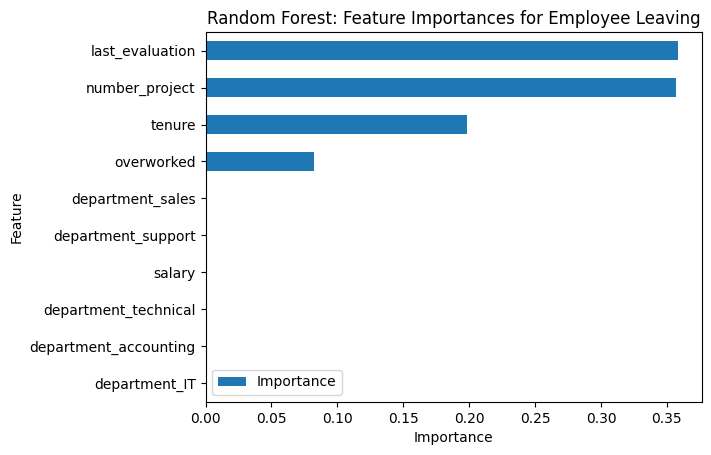

In [ ]:
# Obtain feature importances
feat_impt = rf2.best_estimator_.feature_importances_

# Obtain indices of top 10 features
ind = np.argpartition(rf2.best_estimator_.feature_importances_, -10)[-10:]

# Obtain column labels of top 10 features
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

For this random forest model, it looks like `last_evaluation`, `number_project`, `tenure`, and `overworked` have, in that order, the highest importance. Just like in the decision tree model, these variables are most helpful in predicting the outcome of the variable 'left.'

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




## Recall evaluation metrics

- **AUC** is the area under the ROC curve. It represents the probability that the model ranks a random positive example more highly than a random negative one.
- **Precision** measures the proportion of data points predicted as True that are actually True. In other words, it measures the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.

### Summary of model results

**Logistic Regression**: On the test set, this model achieved precision of 79%, recall of 82%, f1-score of 80% (all weighted averages), and accuracy of 82%.

**Tree-based Machine Learning**: After feature engineering, the random forest model achieved AUC of 93.50%, precision of 86.63%, recall of 89.76%, f1-score of 88.17%, and accuracy of 96.0%, on the test set.

### Conclusion, Recommendations, Next Steps


Based on our findings, Salifort's employees appear to be overworked. To retain and reward valued employees, here are some recommendations for Salifort:

* Conduct interviews to understand high dissatisfaction among four-year tenured employees.

* Consider promotions for employees who have been with the company for at least four years.

* Consider limiting the number of projects—or perhaps hours per project—for a single employee.

* Hold meetings or send messages to ensure all employees are familiar with the company's overtime policies. Ensure all policies should be clear and transparent.

* Make sure overtime is optional. Implement a plan to reward employees who work overtime.

* Hold a meeting with management to discuss policy for fair promotion and evaluations. Consider a proportionate scale to reward employees who contribute with their effort, not only their hours.